In [1]:
from src.create_synthetic import CreateSynthetic
from src.helper_functions import run_synthetic_high_res, create_dataset, create_dataset_parallel
import numpy as np
import matplotlib.pyplot as plt
import icepack.plot
import firedrake
import geopandas as gpd
import rasterio
from rasterio.plot import show

2025-09-30 20:06:04.437243: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-30 20:06:04.563122: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-30 20:06:04.567805: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-09-30 20:06:04.567827: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

Loaded encoder from vae/encoder_model, decoder from vae/decoder_model, percentiles from vae/latent_percentiles.pkl
1/1 [==============================] - 0s 164ms/step
GeoJSON with 4 bounding box lines written to generated_data/boundary_99291.geojson


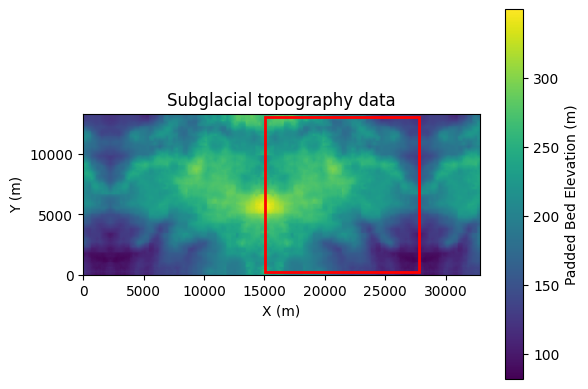

Using default filename: generated_data/boundary_99291.geojson
Reading local outline
Using starting thickness: 5000 m
Using surface slope: -50


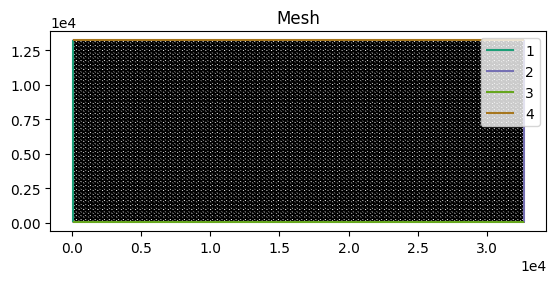

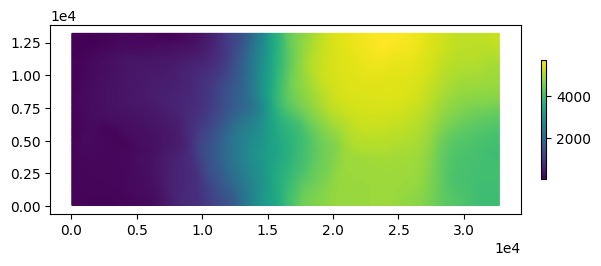

In [ ]:
u0, create_synthetic = run_synthetic_high_res(encoder_path='vae/encoder_model', 
                                              decoder_path='vae/decoder_model', 
                                              percentiles_path='vae/latent_percentiles.pkl',
                           index = None, 
                           scaling_multiplier = 500, 
                           pad_x_minus= 600, 
                           pad_x_plus = 200, 
                           pad_y = 10, 
                           pixel_size_x = 25, 
                           pixel_size_y = 25, 
                           filename = None, 
                           uniform_thickness=5000, 
                           surface_slope=-50, 
                           u_in = 50, 
                           u_out = None, 
                           constant_temperature = 260, 
                           constant_C = 0.0001, 
                           drichlet_ids = [1], 
                           side_wall_ids = [3, 4],
                           nx = 96, ny = 48,
                           plot_topography = True,
                           plot_mesh = True,
                           plot_depth_average_vel= True)

In [73]:
total_form_drag, shear_stress = create_synthetic.compute_form_drag_volume(u0, create_synthetic.h0, create_synthetic.s0, create_synthetic.b)

In [74]:
print("Total form drag is ", total_form_drag)
print("Average shear stress is ", shear_stress)

Total form drag is  70431.5417686606
Average shear stress is  0.00043004472084493044


In [75]:
rms_roughness, slope_roughness = create_synthetic.compute_roughness_metrics(create_synthetic.b)    

In [76]:
print("RMS roughness is ", rms_roughness)
print("Slope roughness is ", slope_roughness)

RMS roughness is  49.30115701043376
Slope roughness is  0.04835383775963804


In [77]:
mean_velocity = create_synthetic.compute_mean_velocity(u0, create_synthetic.h0)

In [78]:
print("Mean velocity is ", mean_velocity)

Mean velocity is  [4818.225605441213, 278.6220808826578]


In [49]:
# constant_C = 0.001 Mean velocity is  [192548.48137620502, -3295.0101973304463]
# constant_C = 0.01 Mean velocity is  [226781.0811996363, -381.54295134312355]
# constant_C = 0.0001 [229596.7847151347, -834.2118097694519]

In [50]:
#df = create_dataset(n_samples=2)